In [6]:
import numpy as np

In [7]:
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
from ExchangeEconomy import ExchangeEconomyClass
model = ExchangeEconomyClass()
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0


In [63]:
# Question 2
## defining p1 
N = 75  ## from task
P1 = []
print(P1)
for i in range(N + 1):
    P1.append( 0.5 + i * (2 / N))
np.round(P1,3)
print(P1)



[]
[0.5, 0.5266666666666666, 0.5533333333333333, 0.58, 0.6066666666666667, 0.6333333333333333, 0.66, 0.6866666666666666, 0.7133333333333334, 0.74, 0.7666666666666666, 0.7933333333333333, 0.8200000000000001, 0.8466666666666667, 0.8733333333333333, 0.9, 0.9266666666666667, 0.9533333333333334, 0.98, 1.0066666666666668, 1.0333333333333332, 1.06, 1.0866666666666667, 1.1133333333333333, 1.1400000000000001, 1.1666666666666667, 1.1933333333333334, 1.2200000000000002, 1.2466666666666666, 1.2733333333333334, 1.3, 1.3266666666666667, 1.3533333333333335, 1.38, 1.4066666666666667, 1.4333333333333333, 1.46, 1.4866666666666668, 1.5133333333333334, 1.54, 1.5666666666666667, 1.5933333333333335, 1.62, 1.6466666666666667, 1.6733333333333333, 1.7000000000000002, 1.7266666666666668, 1.7533333333333334, 1.78, 1.8066666666666666, 1.8333333333333335, 1.86, 1.8866666666666667, 1.9133333333333333, 1.9400000000000002, 1.9666666666666668, 1.9933333333333334, 2.02, 2.046666666666667, 2.0733333333333333, 2.1, 2.126

In [10]:
## work for task 2!
for p1 in P1:
    eps1, eps2 = model.check_market_clearing(p1)
    print(f"For p1 = {p1}:")
    print("   Error in market clearing condition 1:", eps1)
    print("   Error in market clearing condition 2:", eps2)



For p1 = 0.5:
   Error in market clearing condition 1: 0.5333333333333332
   Error in market clearing condition 2: -0.2666666666666666
For p1 = 0.5266666666666666:
   Error in market clearing condition 1: 0.47594936708860747
   Error in market clearing condition 2: -0.25066666666666654
For p1 = 0.5533333333333333:
   Error in market clearing condition 1: 0.42409638554216855
   Error in market clearing condition 2: -0.23466666666666652
For p1 = 0.58:
   Error in market clearing condition 1: 0.3770114942528733
   Error in market clearing condition 2: -0.2186666666666665
For p1 = 0.6066666666666667:
   Error in market clearing condition 1: 0.33406593406593377
   Error in market clearing condition 2: -0.2026666666666665
For p1 = 0.6333333333333333:
   Error in market clearing condition 1: 0.29473684210526313
   Error in market clearing condition 2: -0.18666666666666654
For p1 = 0.66:
   Error in market clearing condition 1: 0.25858585858585836
   Error in market clearing condition 2: -0.17

In [11]:
## we might need to add somehow walras equilibrium 
def calculate_excess_demand(model, p1):
    # Calculate demands for goods 1 and 2 for both agents
    xA1, xA2 = model.demand_A(p1)
    xB1, xB2 = model.demand_B(p1)
    
    # Calculate excess demand for goods 1 and 2
    excess_demand_1 = xA1 + xB1 - (model.par.w1A + (1-model.par.w1A))
    excess_demand_2 = xA2 + xB2 - (model.par.w2A + (model.par.w2A))
    
    return excess_demand_1, excess_demand_2

def find_equilibrium_price(model, num_steps=1000, tolerance=1e-6):
    # Initialize variables to track equilibrium price and total excess demand
    equilibrium_price = None
    min_excess_demand = float('inf')
    
    # Iterate through a range of possible prices
    for i in range(0, np.inf):
        
        # Calculate excess demand at the current price
        excess_demand_1, excess_demand_2 = calculate_excess_demand(model, p1)
        
        # Calculate total excess demand
        total_excess_demand = abs(excess_demand_1) + abs(excess_demand_2)
        
        # Update equilibrium price if total excess demand is lower
        if total_excess_demand < min_excess_demand:
            min_excess_demand = total_excess_demand
        if p1 > 0: 
            equilibrium_price = p1
        
        # Check for convergence based on tolerance
        if total_excess_demand < tolerance:
            break
    
    return equilibrium_price


p1 = np.arange(0,100)
# Call the function to find the equilibrium price
equilibrium_price = calculate_excess_demand(model, p1)
if equilibrium_price is not None:
    print("Equilibrium price:", equilibrium_price)
else:
    print("Equilibrium price not found.")



Equilibrium price: (array([        inf, -0.03333333, -0.31666667, -0.41111111, -0.45833333,
       -0.48666667, -0.50555556, -0.51904762, -0.52916667, -0.53703704,
       -0.54333333, -0.54848485, -0.55277778, -0.55641026, -0.55952381,
       -0.56222222, -0.56458333, -0.56666667, -0.56851852, -0.57017544,
       -0.57166667, -0.57301587, -0.57424242, -0.57536232, -0.57638889,
       -0.57733333, -0.57820513, -0.57901235, -0.5797619 , -0.58045977,
       -0.58111111, -0.58172043, -0.58229167, -0.58282828, -0.58333333,
       -0.58380952, -0.58425926, -0.58468468, -0.58508772, -0.58547009,
       -0.58583333, -0.58617886, -0.58650794, -0.58682171, -0.58712121,
       -0.58740741, -0.58768116, -0.58794326, -0.58819444, -0.58843537,
       -0.58866667, -0.58888889, -0.58910256, -0.58930818, -0.58950617,
       -0.58969697, -0.58988095, -0.59005848, -0.59022989, -0.59039548,
       -0.59055556, -0.59071038, -0.59086022, -0.59100529, -0.59114583,
       -0.59128205, -0.59141414, -0.59154229

/Users/darjababan/Desktop/projects-2024-darja-eloise-christian-1/inauguralproject/ExchangeEconomy.py:25: RuntimeWarning: divide by zero encountered in divide
  demand_x1 =  self.par.alpha * (p1*self.par.w1A + self.par.w2A)/p1
/Users/darjababan/Desktop/projects-2024-darja-eloise-christian-1/inauguralproject/ExchangeEconomy.py:29: RuntimeWarning: divide by zero encountered in divide
  demand_x1 = self.par.beta * (p1* (1-self.par.w1A) + 1- self.par.w2A)/p1


In [25]:
import numpy as np

def calculate_excess_demand(model):
    p1_range = np.arange(0.00001, 10000)
    for p1 in p1_range: 
        xA1, xA2 = model.demand_A(p1)
        xB1, xB2 = model.demand_B(p1)
    
        excess_demand_1 = xA1 + xB1 - (model.par.w1A + (1 - model.par.w1A))
   # excess_demand_2 = xA2 + xB2 - (model.par.w2A + (1 - model.par.w2A))
    
    return excess_demand_1
#p1_range = np.arange(0.00001, 10000)
print(calculate_excess_demand(model))

-0.5999433276661567


In [18]:

def find_equilibrium_price(model, p_range, num_steps=1000, tolerance=1e-6):
    equilibrium_price = None
    min_excess_demand = 0
    
    for p1 in p_range:
        excess_demand_1 = calculate_excess_demand(model, p1)
    print(p1)
        #total_excess_demand = abs(excess_demand_1)
        
    #    if excess_demand_1 < min_excess_demand:
    #        min_excess_demand = excess_demand_1
    #        equilibrium_price = p1
    #    
    #    if excess_demand_1 < tolerance:
    #        break
    #
    #return equilibrium_price

# Assuming you have defined model and p1_range elsewhere
p1_range = np.arange(0.00001, 10000)
equilibrium_price = find_equilibrium_price(model, p1_range)
print(equilibrium_price)
# Example usage
# model = YourModelClass()
# equilibrium_price = find_equilibrium_price(model, np.arange(0, 100))

# if equilibrium_price is not None:
#     print("Equilibrium price:", equilibrium_price)
# else:
#     print("Equilibrium price not found.")


[ 5.66660667e+04 -3.33389999e-02 -3.16668083e-01 ... -5.99943316e-01
 -5.99943322e-01 -5.99943328e-01]
9999.00001
None


In [51]:
## das ergebnis von aufgabe 3 sollte 0.94 sein
import numpy as np

def calculate_excess_demand(model, p1):
    xA1, xA2 = model.demand_A(p1)
    xB1, xB2 = model.demand_B(p1)
    excess_demand_1 = xA1 + xB1 - (model.par.w1A + (1 - model.par.w1A))
    return excess_demand_1

print(calculate_excess_demand(model, 20))

def find_equilibrium_price(model, p_range, num_steps=1000, tolerance=1e-6):
    equilibrium_price = None
    min_excess_demand = 0
    
    for p1 in p_range:
        excess_demand_1 = calculate_excess_demand(model, p1)
        if excess_demand_1 < min_excess_demand:
            min_excess_demand = excess_demand_1
            equilibrium_price = p1
        if excess_demand_1 < tolerance:
            break
    return equilibrium_price

# Assuming you have defined model and p1_range elsewhere
p1_range = np.arange(0.00001, 1000)
equilibrium_price = find_equilibrium_price(model, p1_range)
print(equilibrium_price)
# Example usage
# model = YourModelClass()
# equilibrium_price = find_equilibrium_price(model, np.arange(0, 100))

# if equilibrium_price is not None:
#     print("Equilibrium price:", equilibrium_price)
# else:
#     print("Equilibrium price not found.")


-0.5716666666666667
1.00001


In [79]:
## other approach 
P1 = np.linspace(0.5, 2.5, N)
epsilon_1 = []
epsilon_2 = []
for p1 in P1:
    epsilon_1.append(model.check_market_clearing(p1)[0])
    epsilon_2.append(model.check_market_clearing(p1)[1])
print(epsilon_1)
print(epsilon_2)

for e1, e2 in zip(epsilon_1, epsilon_2):
    if e1 == e2: 
        print("Common excess demand:", p1) 
    else: 
        print("market equilibrium price not found")



[0.5333333333333332, 0.4752136752136752, 0.4227642276422763, 0.3751937984496121, 0.3318518518518516, 0.2921985815602836, 0.2557823129251698, 0.22222222222222182, 0.19119496855345913, 0.16242424242424242, 0.1356725146198829, 0.11073446327683606, 0.08743169398907086, 0.06560846560846562, 0.04512820512820498, 0.02587064676616896, 0.007729468599033618, -0.009389671361502427, -0.025570776255707917, -0.04088888888888903, -0.05541125541125569, -0.06919831223628697, -0.08230452674897132, -0.09477911646586362, -0.10666666666666685, -0.11800766283524905, -0.12883895131086143, -0.1391941391941393, -0.1491039426523299, -0.15859649122807035, -0.16769759450171834, -0.17643097643097655, -0.18481848184818495, -0.19288025889967642, -0.20063492063492067, -0.20809968847352034, -0.2152905198776759, -0.22222222222222232, -0.2289085545722715, -0.2353623188405798, -0.24159544159544172, -0.24761904761904768, -0.25344352617079896, -0.259078590785908, -0.26453333333333345, -0.26981627296587934, -0.2749354005167

0.009473684210526356
0.00909090909090926


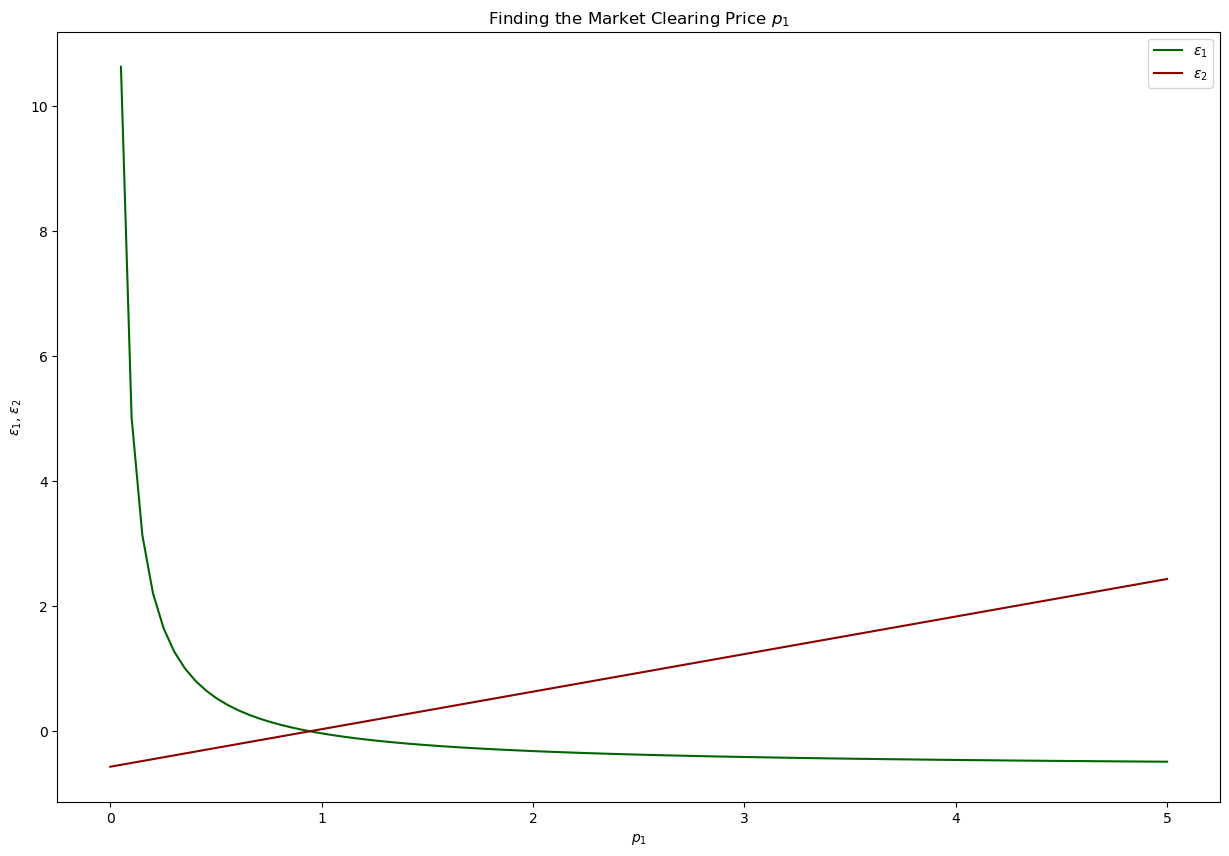

Intersection point: 0.9494949494949495


In [123]:
N  = 100
import matplotlib.pyplot as plt
P1 = np.linspace(0, 5, N)

# Calculate market clearing errors for each p1 in P1
epsilon_1 = []
epsilon_2 = []
for p1 in P1:
    eps1, eps2 = model.check_market_clearing(p1)
    epsilon_1.append(eps1) ## add 
    epsilon_2.append(eps2)

print(np.min(np.abs(epsilon_1)))
print(np.min(np.abs(epsilon_2)))


# Plotting
plt.figure(figsize=(15, 10))
plt.plot(P1, epsilon_1, label='$\\epsilon_1$', color='darkgreen')
plt.plot(P1, epsilon_2, label='$\\epsilon_2$', color='darkred')
plt.title('Finding the Market Clearing Price $p_1$')
plt.xlabel('$p_1$')
plt.ylabel('$\\epsilon_1$, $\\epsilon_2$')
plt.legend()
plt.show()


## for which p1 do we get the intersection? 
# Find the point of intersection
# Find the point of intersection
intersection_point = None
for i in range(1, len(P1)):
    if (epsilon_1[i] > 0 and epsilon_2[i] < 0) or (epsilon_1[i] < 0 and epsilon_2[i] > 0):
        intersection_point = 1-P1[i]
    
        break  # Exit the loop after the first intersection is found since there is only market clearing price

print("Intersection point:", intersection_point)